#Pra_UAS

##Crawling berita dari Detik.com

In [32]:
!pip install requests
!pip install beautifulsoup4

### Mengambil berita dari Detik.com

In [33]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd

In [34]:
import requests
from bs4 import BeautifulSoup

pencarian = 'pilpres 2024'
cari = pencarian.replace(' ','+')
tglAwal = '11/11/2023'
tglAkhir = '11/12/2023'
header={
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
}
berita_list = []

for halaman in range(10):
    url = f'https://www.detik.com/search/searchall?query={cari}&sortby=time&fromdatex={tglAwal}&todatex={tglAkhir}&page={halaman}'

    # Mengambil data dari detik.com
    req = requests.get(url,header)
    soup = BeautifulSoup(req.text, 'lxml')
    listberita = soup.find('div', class_='list media_rows list-berita')
    artikel = listberita.find_all('article')

    for x in artikel:
        url2 = x.find('a')['href']
        judul = x.find('a').find('h2').text

        # Mengambil data dari setiap konten
        urlkonten = requests.get(url2, header)
        soupkonten = BeautifulSoup(urlkonten.text, 'lxml')

        # Mencoba mengekstrak kategori dari struktur HTML
        kategori_element = soupkonten.find('span', class_='detail__label')
        kategori = kategori_element.text.strip() if kategori_element else 'Tidak Diketahui'

        konten = soupkonten.find_all('div', class_='detail__body-text itp_bodycontent')

        for x in konten:
            isi = x.find_all('p')
            y = [y.text for y in isi]
            fixkonten = ''.join(y).replace('\n','').replace('ADVERTISEMENT','').replace('SCROLL TO RESUME CONTENT','')

            # Menambahkan berita ke dalam daftar dengan kategori
            berita_list.append([judul, fixkonten,kategori])

###Berita berupa list dibuat kedalam DataFrame Pandas

Filtering berita dari Kategori News

In [35]:
def del_word(string_awal, kata_hapus):
    string_hasil = string_awal.replace(kata_hapus, '')
    return string_hasil

In [36]:
filter_berita = []

for i in range(len(berita_list)):
    if berita_list[i][2] != 'detikNews':
        berita_list[i][2] = del_word(berita_list[i][2],"detik")
        filter_berita.append(berita_list[i])

Berita yang didapat

In [37]:
frame_berita = pd.DataFrame(filter_berita, columns =['Judul','Isi','Kategori'])
frame_berita

,Judul,Isi,Kategori
0,"Profil Rudi Rohi, Salah Satu Panelis Debat Cap...",Debat calon presiden dan calon wakil presiden ...,Bali
1,"Profil Rudi Rohi, Salah Satu Panelis Debat Cap...",Debat calon presiden dan calon wakil presiden ...,Bali
2,"PKB Yakin Pilpres 2024 Dua Putaran, Anies-Cak ...",Politikus senior Partai Kebangkitan Bangsa (PK...,Bali
3,FX Rudy Ungkap Ganjar Minta Doa Debat Perdana ...,Ketua DPC PDIP Solo FX Hadi Rudyatmo yakin Gan...,Jateng
4,TPD Ganjar-Mahfud Sulsel Andalkan Survei Inter...,Tim Pemenangan Daerah (TPD) Capres-Cawapres no...,Sulsel
5,Sudirman Said Sebut Timnas AMIN Akan Bikin Pos...,Tim Nasional pasangan 01 Anies Baswedan-Muhaim...,Jateng
6,Alasan Bobby Datang ke Rapimda III Golkar Sumut,Wali Kota Medan Bobby Nasution menghadiri Rapi...,Sumut
7,Dede Yusuf Bicara soal Kesiapan Prabowo-Gibran...,Debat capres-cawapres akan digelar di Kantor K...,Jabar
8,Kata Airlangga soal Pilih Ijeck atau Bobby di ...,Partai Golkar memberikan surat tugas ke Wali K...,Sumut
9,Pakar Unpad Nilai Debat Capres Jadi Ajang Pemb...,Debat perdana capres dan cawapres akan digelar...,Jabar


##Prepocessing

###Memuat library nltk dan sastrawi

In [38]:
!pip install sastrawi

import numpy as np
import re, string
import nltk
from tqdm.auto import tqdm

nltk.download('popular')
nltk.download('stopwords')
tqdm.pandas()

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from itertools import chain

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

###Cleaning_text

In [39]:
# Text Cleaning
def cleaning(text):
    # Menghapus tag HTML
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Mengubah seluruh teks menjadi huruf kecil
    text = text.lower()

    # Menghapus spasi pada teks
    text = text.strip()

    # Menghapus Tanda Baca, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub("â", "", text)

    # Menghapus Nomor
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text yang berisi 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

In [40]:
df = frame_berita

Cleaning text

In [41]:
df['clean'] = df['Isi'].apply(lambda x: cleaning(x))

In [42]:
df['clean']

0     debat calon presiden dan calon wakil presiden ...
1     debat calon presiden dan calon wakil presiden ...
2     politikus senior partai kebangkitan bangsa pkb...
3     ketua dpc pdip solo fx hadi rudyatmo yakin gan...
4     tim pemegan daerah tpd capres cawapres nomor u...
5     tim nasional pasangan anies baswedan muhaimin ...
6     wali kota medan bobby nasution menghadiri rapi...
7     debat capres cawapres akan digelar di kantor k...
8     partai golkar memberikan surat tugas ke wali k...
9     debat perdana capres dan cawapres akan digelar...
10    dewan pimpi wilayah dpw nasdem sulawesi selata...
11    khofifah indar parawansa telah mengantongi duk...
12    debat perdana capres cawapres akan berlangsung...
13    survei anies baswedan naik ke peringkat kedua ...
14    badan intelijen negara daerah binda daerah ist...
15    calon presiden capres anies baswedan mengataka...
16    dprd medan bakal melangsungkan pelantikan perg...
17    litbang kompas merilis hasil survei terbar

Tokenize

In [43]:
df['tokenize'] = df['clean'].apply(lambda x: word_tokenize(x))

In [44]:
df['tokenize']

0     [debat, calon, presiden, dan, calon, wakil, pr...
1     [debat, calon, presiden, dan, calon, wakil, pr...
2     [politikus, senior, partai, kebangkitan, bangs...
3     [ketua, dpc, pdip, solo, fx, hadi, rudyatmo, y...
4     [tim, pemegan, daerah, tpd, capres, cawapres, ...
5     [tim, nasional, pasangan, anies, baswedan, muh...
6     [wali, kota, medan, bobby, nasution, menghadir...
7     [debat, capres, cawapres, akan, digelar, di, k...
8     [partai, golkar, memberikan, surat, tugas, ke,...
9     [debat, perdana, capres, dan, cawapres, akan, ...
10    [dewan, pimpi, wilayah, dpw, nasdem, sulawesi,...
11    [khofifah, indar, parawansa, telah, mengantong...
12    [debat, perdana, capres, cawapres, akan, berla...
13    [survei, anies, baswedan, naik, ke, peringkat,...
14    [badan, intelijen, negara, daerah, binda, daer...
15    [calon, presiden, capres, anies, baswedan, men...
16    [dprd, medan, bakal, melangsungkan, pelantikan...
17    [litbang, kompas, merilis, hasil, survei, 

Remove Stopword

In [45]:
stop_words = set(chain(stopwords.words('indonesian')))
df['remove_stopword'] = df['tokenize'].apply(lambda x: [w for w in x if not w in stop_words])

In [46]:
df['remove_stopword']

0     [debat, calon, presiden, calon, wakil, preside...
1     [debat, calon, presiden, calon, wakil, preside...
2     [politikus, senior, partai, kebangkitan, bangs...
3     [ketua, dpc, pdip, solo, fx, hadi, rudyatmo, g...
4     [tim, pemegan, daerah, tpd, capres, cawapres, ...
5     [tim, nasional, pasangan, anies, baswedan, muh...
6     [wali, kota, medan, bobby, nasution, menghadir...
7     [debat, capres, cawapres, digelar, kantor, kpu...
8     [partai, golkar, surat, tugas, wali, kota, med...
9     [debat, perdana, capres, cawapres, digelar, ko...
10    [dewan, pimpi, wilayah, dpw, nasdem, sulawesi,...
11    [khofifah, indar, parawansa, mengantongi, duku...
12    [debat, perdana, capres, cawapres, menit, diba...
13    [survei, anies, baswedan, peringkat, litbang, ...
14    [badan, intelijen, negara, daerah, binda, daer...
15    [calon, presiden, capres, anies, baswedan, mem...
16    [dprd, medan, melangsungkan, pelantikan, perga...
17    [litbang, kompas, merilis, hasil, survei, 

Stemming

In [47]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm.auto import tqdm

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [48]:
df['steming'] = df['remove_stopword'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

  0%|          | 0/20 [00:00<?, ?it/s]

Hasil

In [49]:
df['Isi_terbaru'] = df['steming'].apply(lambda tokens: ' '.join(tokens))

In [50]:
df['Isi_terbaru']

0     debat calon presiden calon wakil presiden capr...
1     debat calon presiden calon wakil presiden capr...
2     politikus senior partai bangkit bangsa pkb hel...
3     ketua dpc pdip solo fx had rudyatmo ganjar pra...
4     tim megan daerah tpd capres cawapres nomor uru...
5     tim nasional pasang anies baswedan muhaimin is...
6     wali kota medan bobby nasution hadir rapimda i...
7     debat capres cawapres gelar kantor kpu ri jaka...
8     partai golkar surat tugas wali kota medan bobb...
9     debat perdana capres cawapres gelar komisi pil...
10    dewan pimpi wilayah dpw nasdem sulawesi selata...
11    khofifah indar parawansa kantong dukung parpol...
12    debat perdana capres cawapres menit bagi segme...
13    survei anies baswedan peringkat litbang kompas...
14    badan intelijen negara daerah binda daerah ist...
15    calon presiden capres anies baswedan bebas paj...
16    dprd medan langsung lantik ganti paw anggota f...
17    litbang kompas rilis hasil survei baru pil

##SVM

Installing library

In [51]:
!pip install scikit-learn
!pip install numpy
!pip install matplotlib

Import library

In [52]:
!pip install googletrans==4.0.0-rc1

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from textblob import TextBlob
from googletrans import Translator
import matplotlib.pyplot as plt

Load data

In [54]:
# Misal dataframe Anda bernama df
X = df['Isi_terbaru'].values
y = df['Kategori'].values

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


TF-IDF

In [55]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X)
X_test_tfidf = vectorizer.transform(X)

Training model SVM

In [56]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y)

SVC(kernel='linear')

In [57]:
y_pred = svm_model.predict(X_test_tfidf)

accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y, y_pred))

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

        Bali       0.83      1.00      0.91         5
     Finance       1.00      1.00      1.00         1
       Jabar       1.00      1.00      1.00         2
      Jateng       1.00      1.00      1.00         3
       Jatim       1.00      1.00      1.00         1
       Jogja       1.00      0.50      0.67         2
      Sulsel       1.00      1.00      1.00         2
       Sumut       1.00      1.00      1.00         4

    accuracy                           0.95        20
   macro avg       0.98      0.94      0.95        20
weighted avg       0.96      0.95      0.94        20



Diagram

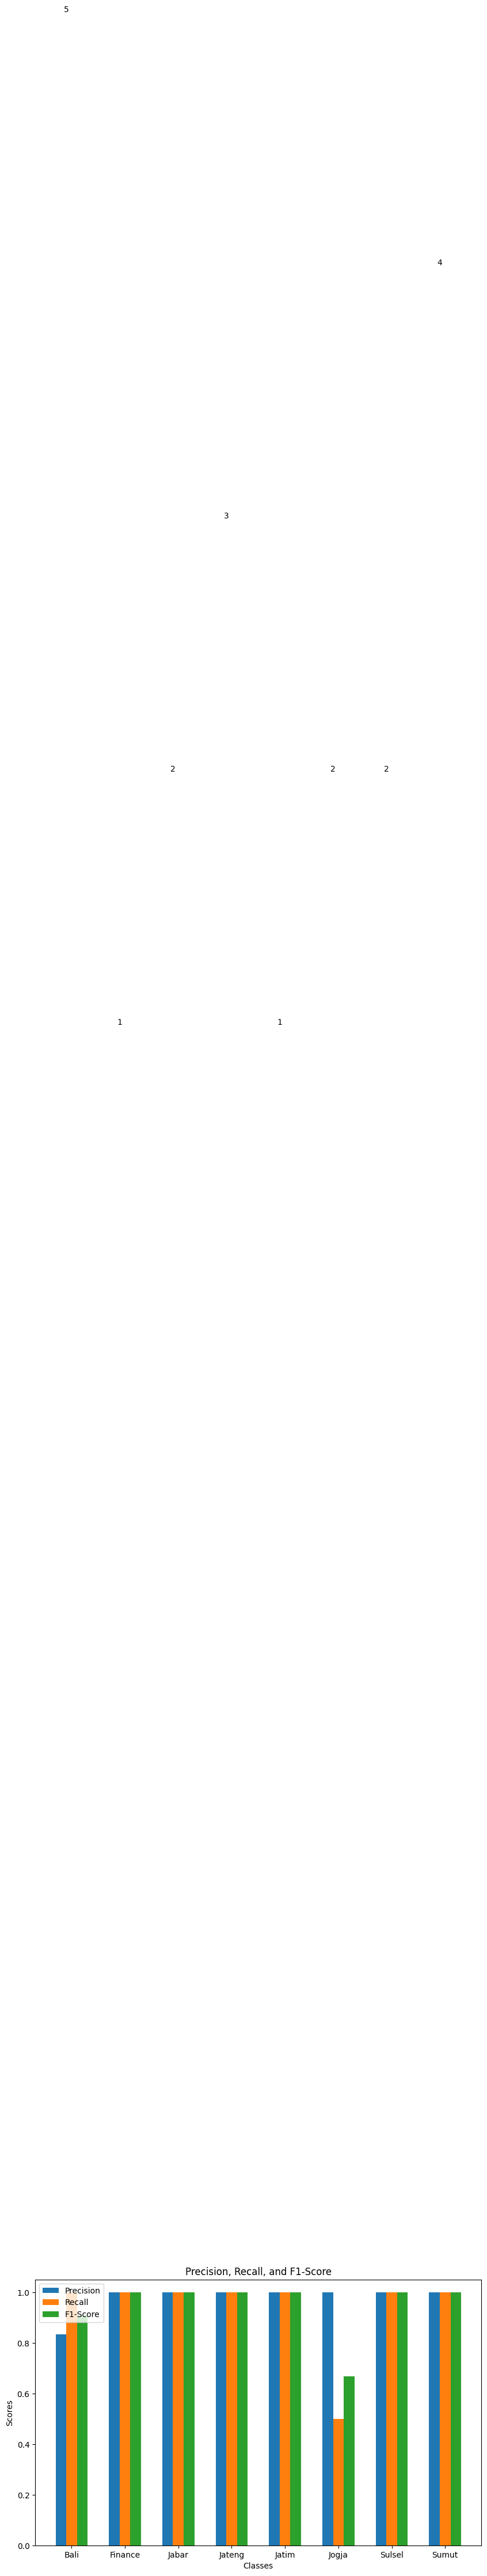

In [58]:
# Membuat diagram batang
report_dict = classification_report(y, y_pred, output_dict=True)
labels = list(report_dict.keys())[:-3]  # Mengambil label kelas (excludes avg/total row)
precision = [report_dict[label]['precision'] for label in labels]
recall = [report_dict[label]['recall'] for label in labels]
f1_score = [report_dict[label]['f1-score'] for label in labels]
support = [report_dict[label]['support'] for label in labels]

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = range(len(labels))

bar1 = ax.bar(index, precision, bar_width, label='Precision')
bar2 = ax.bar([i + bar_width for i in index], recall, bar_width, label='Recall')
bar3 = ax.bar([i + 2 * bar_width for i in index], f1_score, bar_width, label='F1-Score')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(labels)
ax.legend()

# Menambahkan nilai support di atas setiap bar
for i, v in enumerate(support):
    ax.text(i + bar_width / 2, v + 5, str(v), ha='center', va='bottom')

plt.show()

Translated Text 1: 0.00
Translated Text 2: 0.00
Translated Text 3: 0.06
Translated Text 4: 0.19
Translated Text 5: 0.17
Translated Text 6: 0.08
Translated Text 7: -0.13
Translated Text 8: -0.13
Translated Text 9: 0.12
Translated Text 10: 0.12
Translated Text 11: -0.03
Translated Text 12: 0.26
Translated Text 13: 0.00
Translated Text 14: 0.00
Translated Text 15: 0.11
Translated Text 16: 0.15
Translated Text 17: 0.25
Translated Text 18: -0.15
Translated Text 19: 0.09
Translated Text 20: 0.27


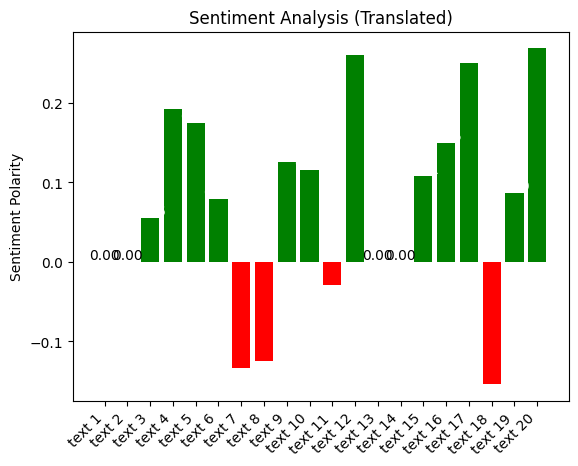

In [59]:
# Contoh data (gantilah dengan data yang sesuai)
texts = X

# Terjemahkan teks dari Bahasa Indonesia ke Bahasa Inggris
translator = Translator()
translated_texts = [translator.translate(text, src='id', dest='en').text for text in texts]

text_list = []

for l in range(len(X)):
    text_list.append("text {}".format(l+1))

# Analisis sentimen untuk setiap teks yang sudah diterjemahkan
sentiments = []
for text in translated_texts:
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity
    sentiments.append(sentiment)

# Menampilkan hasil analisis sentimen
for i, sentiment in enumerate(sentiments):
    print(f'Translated Text {i+1}: {sentiment:.2f}')

# Membuat diagram batang untuk sentimen
fig, ax = plt.subplots()
bars = ax.bar(range(len(translated_texts)), sentiments, color=['green' if s > 0 else 'red' if s < 0 else 'gray' for s in sentiments])
ax.set_xticks(range(len(translated_texts)))
ax.set_xticklabels(text_list, rotation=45, ha='right')
ax.set_ylabel('Sentiment Polarity')
ax.set_title('Sentiment Analysis (Translated)')

# Menambahkan label di atas setiap bar
for bar, sentiment in zip(bars, sentiments):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{sentiment:.2f}', ha='center', va='bottom' if sentiment >= 0 else 'top', color='white' if sentiment != 0 else 'black')

plt.show()


In [64]:
if sum(sentiments) > 0 :
    print("Kesimpulannya berita mengenai pencarian terkait mendapatkan banyak tanggapan positif dari masyarakat")
elif sum(sentiments) < 0 :
    print("Kesimpulannya berita mengenai pencarian terkait mendapatkan banyak tanggapan negatif dari masyarakat ")
else :
    print("Kesimpulannya masyarakat tidak peduli")

Kesimpulannya berita mengenai pencarian terkait mendapatkan banyak tanggapan positif dari masyarakat
